# Final Project Submission

Please fill out:
* Student name: Sarah Lowing
* Student pace: self paced 
* Scheduled project review date/time: 
* Instructor name: Abhineet
* Blog post URL: https://wordpress.com/post/datamonsterdotblog.wordpress.com/47


## Overview
For this analysis we'll be using the King's County Sales dataset, which can be found in kc_house_data.csv.  Each record represents a house sale in the Seattle area for the year 2021-2022.  We will use this data to determine mean price of a home in each neighborhood using zipcodes to group areas.  We'll also examine the impact of water views on the price of a home in order to maximize our saving potential for our client, a real estate agent looking to find midrange homes for sale in the Kings County metro area much.

### Business Understanding
Purchasing a home is one of the largest financial commitments most people will make in their lifetimes.  Todays real estate markets are suffering for a lack of supply of mid-sized starter homes and our client, a real estate agent, specializes in exactly these kinds of homes.  We'll find the mean price of a home for each zipcode and then look to see what kinds of features- views, access to greenways, the overall condition/grade of a home are most likely to impact price in order to identify what kinds of areas and amenities we should avoid to find a resonably priced home in the extra tight market and highly inflated real estate market of Seattle.

### Data Understanding
After checking our data for missing or null values, we wil begin performing some simple statistical analysis to determine which variables have an existing and obvious correlation to our target variable, 'price'.  We'll examine the format of the data (numeric vs categorical, continuous vs discrete) to determine what, if any, transformations need to take place in order to perform  colinearity..  And finally we'll check for normality, and look to apply transformations (linear, logarythmic, polynomial regression or  to any data that does not conform to our L.I.N.E. acronym and is useful for our model and analysis. 

## Preliminary Data Analysis

In [65]:
# import neccessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm

### Inspect and Clean Data

In [66]:
## Check the columns and first few rows
kc= pd.read_csv('Data/kc_house_data.csv')
len(kc)

30155

In [67]:
kc.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


In [11]:
# Generate summary statistics
kc.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,3.015500e+04,3.015500e+04,30155.000000,30155.000000,30155.000000,3.015500e+04,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000
mean,4.538104e+09,1.108536e+06,3.413530,2.334737,2112.424739,1.672360e+04,1.543492,1809.826098,476.039396,330.211142,217.412038,1975.163953,90.922301,47.328076,-121.317397
std,2.882587e+09,8.963857e+05,0.981612,0.889556,974.044318,6.038260e+04,0.567717,878.306131,579.631302,285.770536,245.302792,32.067362,416.473038,1.434005,5.725475
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,2.064175e+09,6.480000e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405320,-122.326045
50%,3.874011e+09,8.600000e+05,3.000000,2.500000,1920.000000,7.480000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551380,-122.225585
75%,7.287100e+09,1.300000e+06,4.000000,3.000000,2619.500000,1.057900e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669913,-122.116205
max,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


We can see some of our mean values here, as well as visually inspect for for any missing values or irregularities.  So far it looks good!

##### Checking for NaN

In [4]:
#checking for null values
kc.isnull().sum()

id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
greenbelt         0
nuisance          0
view              0
condition         0
grade             0
heat_source      32
sewer_system     14
sqft_above        0
sqft_basement     0
sqft_garage       0
sqft_patio        0
yr_built          0
yr_renovated      0
address           0
lat               0
long              0
dtype: int64

In [68]:
#Because of the small number of NaN values, we can drop null rows
kc.dropna(inplace=True)

#### Adding Zipcodes to the DataFrame
So far everything looks good.  But it would be nice to have an additional column, "zip", that contains the zip code of each entry so that we can make sure our records are all actually located in King's County, as well as to group houses in neighborhoods for our model later on.

In [69]:
#extract zip codes.  We should have 224 different zipcodes -but there's an extra 176
kc['zip'] = kc['address'].str.findall(r'([0-9]\d+)').apply(
    lambda x: x[-1] if len(x) >= 1 else '')

In [55]:
# examine zip codes, kc county homes ahould start with 98 but we clearly have some that do not 
zip_counts= kc['zip'].value_counts()
zip_counts

98042    992
98038    857
98103    761
98115    760
98117    748
        ... 
11762      1
89108      1
99403      1
68455      1
53214      1
Name: zip, Length: 399, dtype: int64

In [56]:
# closer look at address to double check that entries are erroneous, and not our code.  Clearly some bad data in here
df_bad_zips = kc[~kc['zip'].astype(str).str.startswith('98')]
print(df_bad_zips['address'])

12       5712 A Street, Omaha, Nebraska 68106, United S...
53       1820 South State Street, Vineland, New Jersey ...
62       1804 Spruce Street, McLeansboro, Illinois 6285...
159      626 13th Street, Union City, New Jersey 07087,...
172      11th Avenue, West Babylon, New York 11704, Uni...
                               ...                        
30029    Avenue Cuts, 34 Ridge Rd, North Arlington, New...
30044    36th Avenue, Kenosha, Wisconsin 53142, United ...
30116    57th Street Lane NW, Rochester, Minnesota 5590...
30129    214 B, Mount Laurel, New Jersey 08054, United ...
30144    2954 Northwest 85th Street, Miami, Florida 331...
Name: address, Length: 911, dtype: object


In [72]:
#Does the address have Seattle, Washington in it?  
df_bad_zips[df_bad_zips['address'].str.contains('Washington')]

In [71]:
# Doesn't look that way, so we'll drop the entries from the df in that are not from the Seattle area (df_bad_zips)
df_kc = kc[kc['zip'].astype(str).str.startswith('98')]
len(df_kc)

29200

In [21]:
#Check if we've got the right number of records 
bool(len(df_kc) + len(df_bad_zips)==len(kc))

True

#### Inspect Datatypes of Columns

In [12]:
#Visualize datatypes for future analysis
df_kc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29200 entries, 0 to 30154
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             29200 non-null  int64  
 1   date           29200 non-null  object 
 2   price          29200 non-null  float64
 3   bedrooms       29200 non-null  int64  
 4   bathrooms      29200 non-null  float64
 5   sqft_living    29200 non-null  int64  
 6   sqft_lot       29200 non-null  int64  
 7   floors         29200 non-null  float64
 8   waterfront     29200 non-null  object 
 9   greenbelt      29200 non-null  object 
 10  nuisance       29200 non-null  object 
 11  view           29200 non-null  object 
 12  condition      29200 non-null  object 
 13  grade          29200 non-null  object 
 14  heat_source    29200 non-null  object 
 15  sewer_system   29200 non-null  object 
 16  sqft_above     29200 non-null  int64  
 17  sqft_basement  29200 non-null  int64  
 18  sqft_g

We can see that the data has several different types. Some potentially relevant data for 'price' is categorical, like 'waterfront' and 'condition'.  We'll need to OHE these features if we'd like to add those variables to our model.
None of our numeric variables are categorical in nature, with the exception of 'id', 'lat' and 'long'.  While we won't need these for our statistical analysis, 'lat' and 'long' could come in handy later if we want to map home sales.  

The distributions of our variables does not appear normal, which alerts us that we will need to transform our data in order to progress with an effective model.  Let's view value counts of our kc dataframe to get a more concrete idea of how our categorical data is distributed

In [73]:
# Value counts for categorical data
categoricals = df_kc.select_dtypes("object")
categoricals=categoricals.drop(['date', 'address'], axis=1).copy()

In [ ]:
for col in categoricals:
    print(df_clean[col].value_counts(), "\n")

Examine values of columns we might use in our model for outliers

In [149]:
#nothing obviously kooky here to fix
df_kc['bathrooms'].describe()

count    29200.000000
mean         2.333168
std          0.894491
min          0.000000
25%          2.000000
50%          2.500000
75%          3.000000
max         10.500000
Name: bathrooms, dtype: float64

In [158]:
df_clean['grade'].describe()

count         29140
unique           12
top       7 Average
freq          11551
Name: grade, dtype: object

In [120]:
df_clean['grade'].value_counts()

7 Average        11427
8 Good            8799
9 Better          3421
6 Low Average     2328
10 Very Good      1032
5 Fair             188
11 Excellent       185
12 Luxury           17
4 Low                6
3 Poor               3
Name: grade, dtype: int64

We can see the vast number of houses on the market are of average quality.  There are very, very few houses being sold in the Seattle area that in what could be considered 'bad' condition.  We could consider the 'poor', 'low', and 'luxury' columns as outliers due to the small number of houses sold in those grades.  It might be worthwhile to drop those categories and convert the data to numeric from string.

In [ ]:
grade_dict = {'3 Poor':1,'4 Low':2,'5 Fair':3,'6 Low Average':4,'7 Average':5, '8 Good':6,
              '9 Better':7, '10 Very Good':8, '11 Excellent':9, '12 Luxury':10}
df_clean.grade.replace(to_replace=grade_dict,inplace=True) 

In [124]:
df_clean= df_clean[(df_clean['grade']<10) & (df_clean['grade']> 2)]


In [155]:
df_clean['grade'].value_counts()

5    11427
6     8799
7     3421
4     2328
8     1032
3      188
9      185
Name: grade, dtype: int64

## Preliminary Review of Numeric Variables

This is also a relatively long list of variables/columns.  We'll want to make sure that there's no co-liniarity between the variables in our final model, so we'll take a look at a correlation heatmap of our dataframe to identify possible trouble spots for our numeric variables.

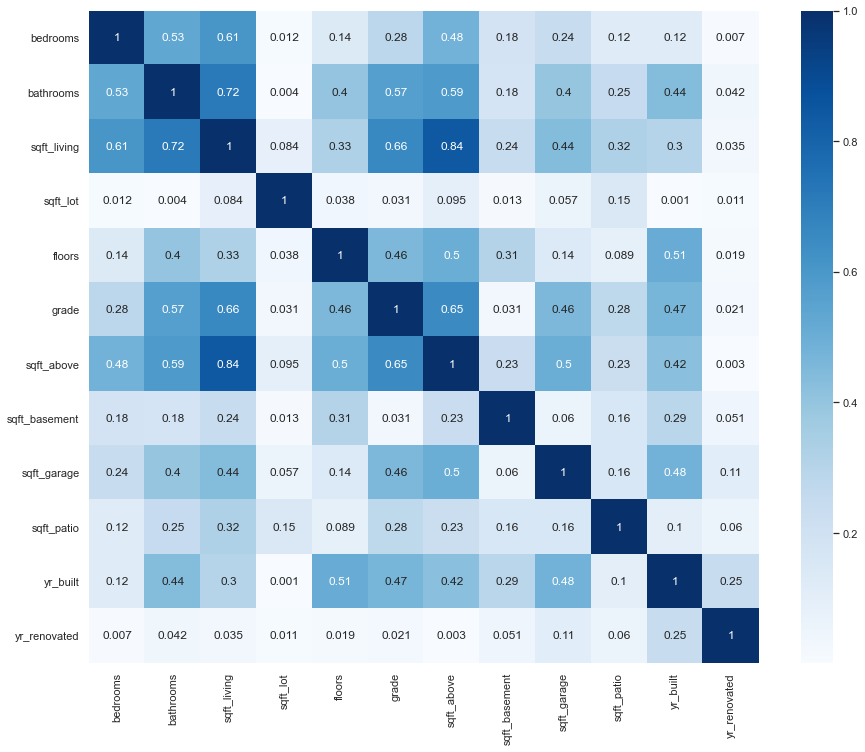

In [156]:
kc_colinearity = df_clean.drop(columns=['price', 'lat', 'long', 'id'])
corr = round(abs(kc_colinearity.corr()),3)
sns.set(rc = {'figure.figsize':(15,12)})
sns.heatmap(corr, cmap="Blues", annot=True);

We can see that there are some trouble spots in here, "sqft_living" has a collinear relationship with "sqft_above", followed by "bathrooms" and "bedrooms".  Because collinearity can skew our multiple regression model, we'll pick 'grade' to use in our OLS model.

Our next step is to generate scatterplots to view the distributions of the continuous numeric variables that have the highest correlation to price and look for the visual markers of a linear relationship.  We'll start with "sqft_living", our most variable most likely to impact price. 

### Clean "sqft_living"

In [150]:
df_kc['sqft_living'].describe()

count    29200.000000
mean      2131.650753
std        976.713568
min          3.000000
25%       1440.000000
50%       1940.000000
75%       2640.000000
max      15360.000000
Name: sqft_living, dtype: float64

Our std of 976 indicates that we should also be looking for outliers- When considering mean house size, that's a pretty large margin of error (about 1/2 of the average sized house in KC) and so there must be houses that are exceptionally large or small that are skewing our model.  However, we need to be very careful about how we do this, as removing data can lead to model manipulation and less acuuracy overall.  We'll remove all houses in the typical oulier range of 3%, to minimize model manipulation, but gain some accuracy in our predictions.  This will drop considerably fewer records than preserving the middle quartile range, so our model should still be fairly accurate.

In [75]:
q_low = df_kc['sqft_living'].quantile(0.03)

q_high = df_kc['sqft_living'].quantile(0.97)

In [76]:
df_clean= df_kc[(df_kc['sqft_living']< q_high) & (df_kc['sqft_living']> q_low)]


In [54]:
len(df_kc)-len(df_clean)

1794

In [115]:
df_clean['sqft_living'].describe()

count    27406.000000
mean      2080.322776
std        775.188722
min        850.000000
25%       1470.000000
50%       1950.000000
75%       2580.000000
max       4290.000000
Name: sqft_living, dtype: float64

We can see that our std has dropped to 775 for sqft_living, our model has improved by dropping just 1794 outliers out of 292,00 records

In [77]:
# Lets build a model to fit a regression line and check the distribution
y=df_clean['price']
X=df_clean['sqft_living']

sgft_model = sm.OLS(y, sm.add_constant(X))
sqft_results = sgft_model.fit()

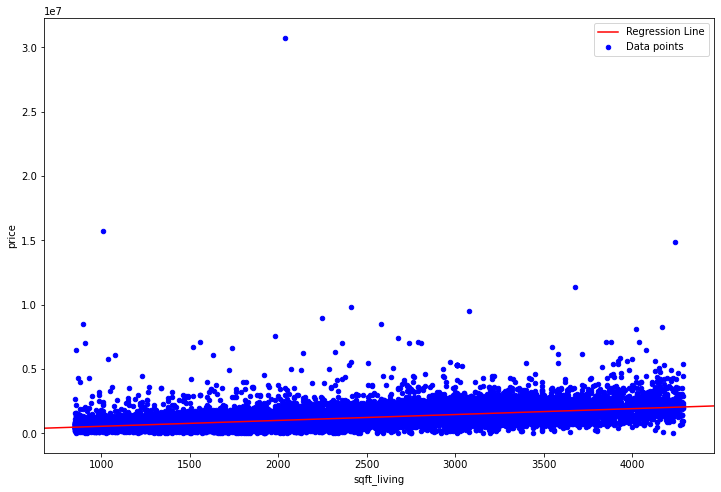

In [78]:
fig, ax = plt.subplots(figsize=(12,8))
df_clean.plot.scatter(x="sqft_living", y="price", label="Data points", color='blue', ax=ax)
sm.graphics.abline_plot(model_results=sqft_results, label="Regression Line", color='red', ax=ax)
ax.legend();

### Analyze of Numeric Nariables

Our correlation matrix showed that sqft_living had the highest correlation to price.  And we can see from the plot above that when we remove outliers there's a linear relationship between sqft_living and price. However, there's a co-correlation between sqft_living and zip codes, and because we are mostly interested in knowing which neighborhoods our thrifty agent should be looking in, and what the average prices they can expect, we're going to use our "zips" column to build our first model.  

## Preliminary Review of Categorical Data
Lets' begin by looking at a model of all our categorical data to see which variables correlate most closely with price

In [146]:
categoricals_clean = df_clean.select_dtypes("object")
categoricals_clean=categoricals_clean.drop(['date', 'address'], axis=1).copy()

In [147]:
y_raw = df_clean["price"]
X_raw_cat = categoricals_clean
X_raw_cat = pd.get_dummies(X_raw_cat)

X_raw_cat.drop(['waterfront_NO', 'greenbelt_NO',
               'nuisance_YES', 'condition_Poor',
               'heat_source_Electricity', 'sewer_system_PUBLIC', 'zip_98045'], 
               axis=1, inplace=True)


In [148]:
cat_model= sm.OLS(y_raw, sm.add_constant(X_raw_cat))
cat_results = cat_model.fit()
cat_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.470
Method:                 Least Squares   F-statistic:                     227.5
Date:                Mon, 27 Feb 2023   Prob (F-statistic):               0.00
Time:                        15:59:59   Log-Likelihood:            -3.9772e+05
No. Observations:               27380   AIC:                         7.957e+05
Df Residuals:                   27272   BIC:                         7.965e+05
Df Model:                         107                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                            3.698e+16   6.75e+16      0.548      0.584   -9.54e+16    1.69e+17
waterfront_YES                   5.001e+05   3.16e+04     15.832      0.000    4.38e+05    5.62e+05
greenbelt_YES                    1.454e+05   1.97e+04      7.376      0.000    1.07e+05    1.84e+05
nuisance_NO                      7.425e+04   8269.364      8.979      0.000     5.8e+04    9.05e+04
view_AVERAGE                    -3.698e+16   6.75e+16     -0.548      0.584   -1.69e+17    9.54e+16
view_EXCELLENT                  -3.698e+16   6.75e+16     -0.548      0.584   -1.69e+17    9.54e+16
view_FAIR                       -3.698e+16   6.75e+16     -0.548      0.584   -1.69e+17    9.54e+16
view_GOOD                       -3.698e+16   6.75e+16     -0.548      0.584   -1.69e+17    9.54e+16
view_NONE                       -3.698e+16   6.75e+16     -0.548      0.584   -1.69e+17    9.54e+16
condition_Average                1.937e+05   7.74e+04      2.503      0.012     4.2e+04    3.45e+05
condition_Fair                   -7.01e+04   8.55e+04     -0.820      0.412   -2.38e+05    9.75e+04
condition_Good                   1.551e+05   7.75e+04      2.002      0.045    3245.125    3.07e+05
condition_Very Good              2.029e+05   7.78e+04      2.608      0.009    5.04e+04    3.55e+05
heat_source_Electricity/Solar   -1.952e+04   6.78e+04     -0.288      0.773   -1.52e+05    1.13e+05
heat_source_Gas                  1.361e+05   8031.529     16.946      0.000     1.2e+05    1.52e+05
heat_source_Gas/Solar             3.44e+05   5.48e+04      6.280      0.000    2.37e+05    4.51e+05
heat_source_Oil                 -1.701e+04   1.19e+04     -1.430      0.153   -4.03e+04    6303.644
heat_source_Oil/Solar            1.157e+05   2.47e+05      0.468      0.640   -3.69e+05       6e+05
heat_source_Other                1.794e+05   1.14e+05      1.573      0.116   -4.42e+04    4.03e+05
sewer_system_PRIVATE             1.406e+04   1.05e+04      1.336      0.181   -6563.200    3.47e+04
sewer_system_PRIVATE RESTRICTED  2.167e+05   3.49e+05      0.620      0.535   -4.68e+05    9.02e+05
sewer_system_PUBLIC RESTRICTED    2.11e+05   3.49e+05      0.604      0.546   -4.74e+05    8.96e+05
zip_98001                       -3.971e+05   3.07e+04    -12.947      0.000   -4.57e+05   -3.37e+05
zip_98002                       -4.751e+05   3.55e+04    -13.387      0.000   -5.45e+05   -4.06e+05
zip_98003                       -4.045e+05   3.36e+04    -12.052      0.000    -4.7e+05   -3.39e+05
zip_98004                        1.753e+06   4.08e+04     42.968      0.000    1.67e+06    1.83e+06
zip_98005                        9.089e+05   4.63e+04     19.641      0.000    8.18e+05       1e+06
zip_98006                        6.137e+05    3.3e+04     18.584      0.000    5.49

Our model is statistically significant. There's collinearity between our variables, like "waterfront_yes" and "zip", and so moving forward we'll only include zip in our model.  Many of our variables are statistically significant, with a significant coefficient value as well.  As expected we see see variables like 'zip', 'waterfront_YES' make a big difference in 'price'.  Because we dropped the zip code in our model that was closest to the mean price, we can say that for each'zip' we could add or subtract the coefficient value from our intercept to find the gain or loss from the mean value of a house in that zipcode. Let's get a closer look at how our variables interact with mean 'price'

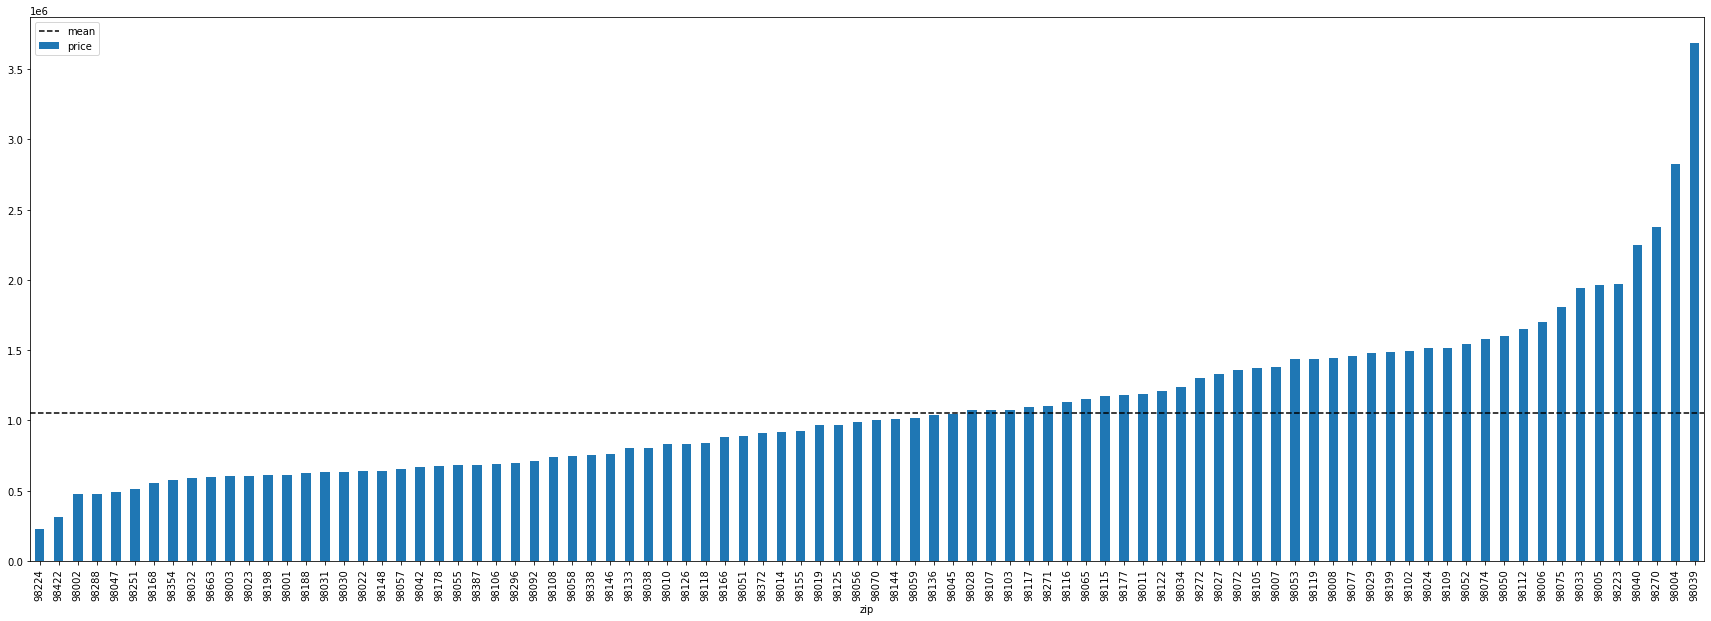

In [149]:
fig, ax = plt.subplots(figsize=(30,10))
df_clean.groupby("zip").mean().sort_values(by="price").plot.bar(y="price", ax=ax)
ax.axhline(y=df_clean["price"].mean(), label="mean", color="black", linestyle="--")

ax.legend();

In [111]:
# That's a bit hard to read, let's take a closer look
#df_clean.groupby("zip").mean().sort_values(by="price")

A very clear mostly linear relationship between price and neighborhoods exists when grouped and sorted by mean price of home for "zip", moving forward it would be interesting to see this mapped out, with a mean price per neighborhood as a pop out on an interactive map.  At the very least, we now have a way of listing neighborhoods where mean house prices are below the mean house price for the Seattle area, which will be helpful for our thrifty agent... 

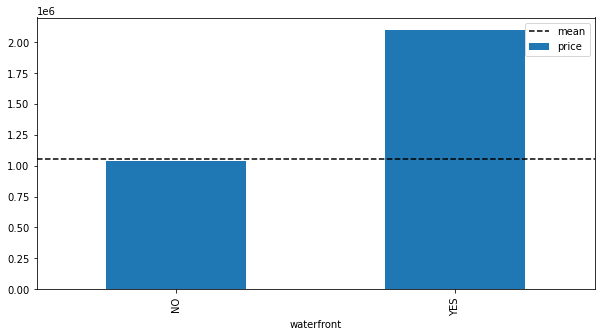

In [16]:
# Waterfront sns.barplot(data=df, x='waterfront', y='price')
fig, ax = plt.subplots(figsize=(10,5))
df_clean.groupby("waterfront").mean().sort_values(by="price").plot.bar(y="price", ax=ax)
ax.axhline(y=df_clean["price"].mean(), label="mean", color="black", linestyle="--")

ax.legend();

There's clearly a realtionship between "price" and waterfront views.  There's likely strong colinearity between "zips" and "waterfront_YES", so as stated before, we should not be using both these variables in the same model.

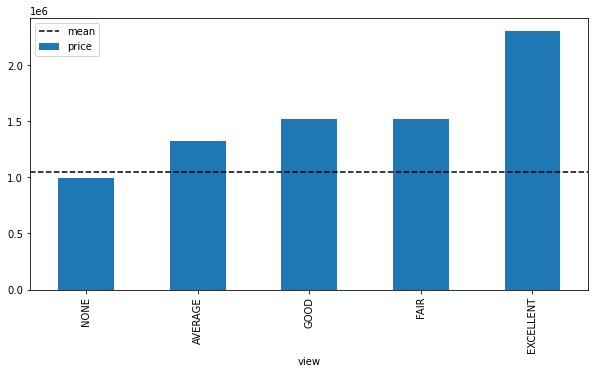

In [150]:
#view
fig, ax = plt.subplots(figsize=(10,5))
df_clean.groupby("view").mean().sort_values(by="price").plot.bar(y="price", ax=ax)
ax.axhline(y=df_clean["price"].mean(), label="mean", color="black", linestyle="--")

ax.legend();

Not looking great..."fair" and "good" look about equal, and there's a big uptick for "excellent".  It could be that"excellent" has a statistically significant relationship with "price" but with so many other cloumns to choose from, we just won't include this in our model.

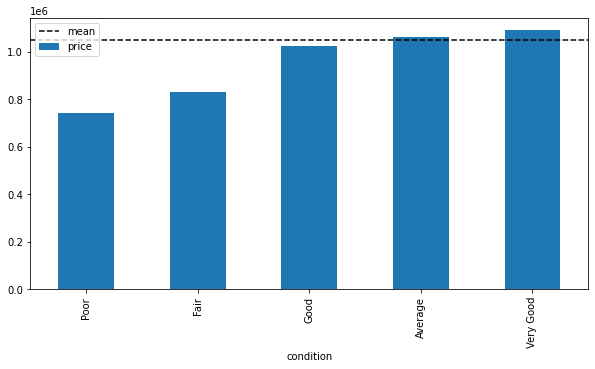

In [151]:
fig, ax = plt.subplots(figsize=(10,5))
df_clean.groupby("condition").mean().sort_values(by="price").plot.bar(y="price", ax=ax)
ax.axhline(y=df_clean["price"].mean(), label="mean", color="black", linestyle="--")

ax.legend();

We can see that there's not a linear relationship between condition and price if we examine the column names- average and very good have the same median price even though average falls two spots below very good when arranged by value. 

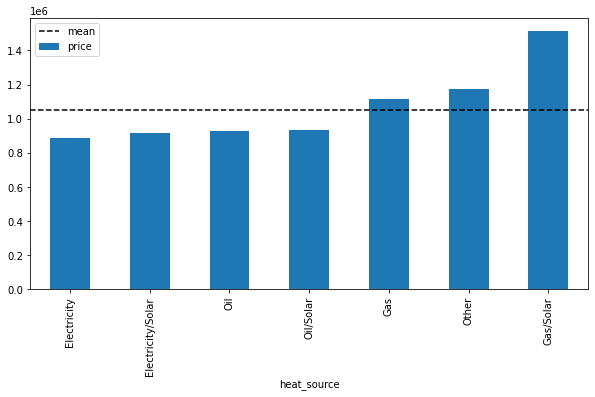

In [152]:
fig, ax = plt.subplots(figsize=(10,5))
df_clean.groupby("heat_source").mean().sort_values(by="price").plot.bar(y="price", ax=ax)
ax.axhline(y=df_clean["price"].mean(), label="mean", color="black", linestyle="--")

ax.legend();

I was curious if having solar power would add to the value of a house, but it looks like only houses that are equipped with gas and solar power experience an uptick in price compared to the median home price in Seattle.  However, it could be that other factors are at play.  Most large houses are unable to run exclusively on solar, and would need a backup for generating heat, hence the gas/solar mix.  There's also a statistically significant relationship between price and sqft so eco-freindly solar only smaller homes would be more likely to have smaller square footage, depressing their sales value. 

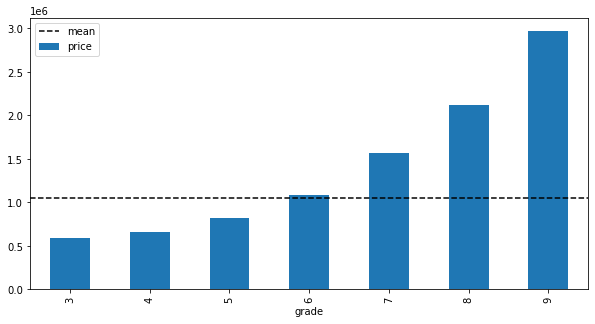

In [153]:

fig, ax = plt.subplots(figsize=(10,5))
df_clean.groupby("grade").mean().sort_values(by="price").plot.bar(y="price", ax=ax)
ax.axhline(y=df_clean["price"].mean(), label="mean", color="black", linestyle="--")

ax.legend();

### Analyze Plot of Categorical Variables

Of the categorical variables, waterfront, zip, and grade seem the most likely to have a statistically significant relationship with price.  We'll need to OHE these if we're including them in our model.

### 1st Model: Baseline

#### Using Home Grade and Zip to Predict Home Prices 
Our first model will be unchanged by any kind of linear or logarithmic transformations. 

If the model is correctly specified, then we should see an even distribution of the residuals in a
scatter plot


In [157]:
y_raw = df_clean["price"]
X_raw = df_clean[['grade', 'zip']]
X_raw = pd.get_dummies(X_raw, columns=['zip'])
X_raw.drop(['zip_98045'], axis=1, inplace=True)


In [158]:
baseline_model = sm.OLS(y_raw, sm.add_constant(X_raw))
baseline_results = baseline_model.fit()
baseline_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.506
Model:                            OLS   Adj. R-squared:                  0.504
Method:                 Least Squares   F-statistic:                     317.0
Date:                Mon, 27 Feb 2023   Prob (F-statistic):               0.00
Time:                        16:17:27   Log-Likelihood:            -3.9682e+05
No. Observations:               27380   AIC:                         7.938e+05
Df Residuals:                   27291   BIC:                         7.945e+05
Df Model:                          88                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.933e+05   2.93e+04    -16.817      0.000   -5.51e+05   -4.36e+05
grade       2.599e+05   3205.813     81.075      0.000    2.54e+05    2.66e+05
zip_98001  -2.715e+05   2.96e+04     -9.163      0.000    -3.3e+05   -2.13e+05
zip_98002  -2.478e+05   3.42e+04     -7.246      0.000   -3.15e+05   -1.81e+05
zip_98003  -2.992e+05   3.21e+04     -9.309      0.000   -3.62e+05   -2.36e+05
zip_98004   1.672e+06    3.9e+04     42.817      0.000     1.6e+06    1.75e+06
zip_98005   8.274e+05   4.44e+04     18.633      0.000     7.4e+05    9.14e+05
zip_98006   5.247e+05   3.15e+04     16.673      0.000    4.63e+05    5.86e+05
zip_98007   3.931e+05   4.48e+04      8.769      0.000    3.05e+05    4.81e+05
zip_98008   4.767e+05   3.31e+04     14.403      0.000    4.12e+05    5.42e+05
zip_98010  -1.974e+05   3.54e+04     -5.576      0.000   -2.67e+05   -1.28e+05
zip_98011   1.752e+05   3.74e+04      4.679      0.000    1.02e+05    2.49e+05
zip_98014  -1.718e+04   4.54e+04     -0.378      0.705   -1.06e+05    7.18e+04
zip_98019  -5.169e+04    3.8e+04     -1.359      0.174   -1.26e+05    2.28e+04
zip_98022   -2.27e+05   3.22e+04     -7.059      0.000    -2.9e+05   -1.64e+05
zip_98023  -3.522e+05   2.91e+04    -12.116      0.000   -4.09e+05   -2.95e+05
zip_98024   5.009e+05   5.17e+04      9.695      0.000       4e+05    6.02e+05
zip_98027   2.411e+05   3.37e+04      7.148      0.000    1.75e+05    3.07e+05
zip_98028   9.503e+04   3.42e+04      2.776      0.006    2.79e+04    1.62e+05
zip_98029   2.883e+05   3.53e+04      8.175      0.000    2.19e+05    3.57e+05
zip_98030  -2.748e+05   3.34e+04     -8.225      0.000    -3.4e+05   -2.09e+05
zip_98031  -2.746e+05   3.07e+04     -8.953      0.000   -3.35e+05   -2.14e+05
zip_98032  -2.643e+05   4.25e+04     -6.217      0.000   -3.48e+05   -1.81e+05
zip_98033   8.552e+05   3.01e+04     28.399      0.000    7.96e+05    9.14e+05
zip_98034   3.159e+05    2.9e+04     10.893      0.000    2.59e+05    3.73e+05
zip_98038  -1.581e+05   2.78e+04     -5.687      0.000   -2.13e+05   -1.04e+05
zip_98039   2.499e+06   8.16e+04     30.632      0.000    2.34e+06    2.66e+06
zip_98040   9.959e+05   3.67e+04     27.152      0.000    9.24e+05    1.07e+06
zip_98042  -2.754e+05   2.72e+04    -10.137      0.000   -3.29e+05   -2.22e+05
zip_98047  -2.506e+05   5.93e+04     -4.230      0.000   -3.67e+05   -1.34e+05
zip_98050   6.643e+05   3.38e+05      1.964      0.049    1488.967    1.33e+06
zip_98051  -5.574e+04   6.76e+04     -0.825      0.410   -1.88e+05    7.67e+04
zip_98052   4.598e+05   3.02e+04     15.221      0.000    4.01e+05    5.19e+05
zip_98053   3.562e+05   3.38e+04     10.537      0.000     2.9e+05    4.23e+05
zip_98055  -2.266e+05   3.96e+04     -5.722      0.000   -3.04e+05   -1.49e+05
zip_98056   6.204e+04   3.12e+04      1.990      0.047     934.609    1.23e+05
zi

We can see that our model explains 50% of the variation by the r-squared value.  This is a little worrysome, because we have many (88) variables and would have expected to see a higher r-value as a result.   The model is statistically significant overall as demonstrated by the Prob(F-statistic), as are many of our zip variables- Those that are not were zip codes that are closest in value to the overall mean price of a house in KC.  We can reject the null hypothesis that neighborhood and house grade have no impact on price.  We don't see any co-linearity warnings, so we can assume that we've done a good job of selected columns/variables. We do, however, have a negative intercept and will need to center our model before we can make better sense of our coefficient values.  We'll also want to check our MAE, or mean absolute error, to see by how much our model may be off.  Our Durbin-Watson value is between the desired 1-2 range, indicating that our results are homoscedactic- the errors are evenly distributed, but our Jarque-Bera scores are super high, contradicting that.  We should run a test to check for homoskedasticity.

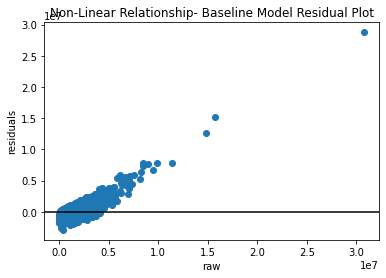

In [131]:
# Analyze coefficiants and p values here
fig, ax = plt.subplots()

ax.scatter(y_raw, baseline_results.resid)
ax.axhline(y=0, color="black")
ax.set_xlabel("raw")
ax.set_ylabel("residuals")
ax.set_title("Non-Linear Relationship- Baseline Model Residual Plot");

If our data were normally distributed we would see our residuals scattered across the plot rather than clumped together like we do here.  But let's prove that there's a non-linear relationship between the variables in our model and price statistically as well by using a rainbow test.  In a rainbow test, even if the true relationship is non-linear, a good linear fit can be achieved on a subsample in the “middle” of the data, in the arc of the "rainbow".  The null hypothesis is the fit of the model using full sample is the same as using a central subset. The null hypothesis is rejected whenever the overall fit is significantly worse than the fit for the subsample.  A rainbow test returns the f-statistic and p-value, and unlike the way we usually interpret p-values (a low score is good) in this instance, a low score would indicate a non-linear relationship.

In [141]:
#.  If there's a non-linear relationship we will see non-zero values for residuals
from statsmodels.stats.diagnostic import linear_rainbow
linear_rainbow(baseline_results)

(1.211421606149961, 2.2061241245687424e-29)

The p-value of our first model is such a small percentage we might as well consider it zero, our data is non-linear. 

In [142]:
mae_baseline = baseline_results.resid.abs().sum() / len(y_raw)
print(mae_baseline) 

263112.6636992197


That's a pretty high MAE, even for real estate.  First we'll center our model, then try to improve our it by log transforming price. 

### 2nd Model:  Centering Data to Improve Intercept Interpretability 

In [134]:
y_centered = y_raw.copy()
X_centered = X_raw.copy()

In [135]:
for col in X_centered.columns:
    X_centered[col] = X_centered[col] - X_centered[col].mean()
    
X_centered.describe()

,grade,zip_98001,zip_98002,zip_98003,zip_98004,zip_98005,zip_98006,zip_98007,zip_98008,zip_98010,...,zip_98271,zip_98272,zip_98288,zip_98296,zip_98338,zip_98354,zip_98372,zip_98387,zip_98422,zip_98663
count,2.738000e+04,2.738000e+04,2.738000e+04,2.738000e+04,2.738000e+04,2.738000e+04,2.738000e+04,2.738000e+04,2.738000e+04,2.738000e+04,...,2.738000e+04,2.738000e+04,2.738000e+04,2.738000e+04,2.738000e+04,2.738000e+04,2.738000e+04,2.738000e+04,2.738000e+04,2.738000e+04
mean,2.901340e-16,7.769128e-18,-4.095417e-18,1.232680e-18,-1.394875e-18,2.854627e-18,6.163400e-19,-1.058321e-18,2.189629e-18,-4.217063e-19,...,-8.920711e-20,1.013717e-20,-2.838408e-20,7.096020e-21,3.446638e-20,-3.223621e-19,2.230178e-20,1.115089e-20,1.115089e-20,3.243895e-20
std,1.002860e+00,1.477104e-01,1.121807e-01,1.244757e-01,8.988098e-02,7.502816e-02,1.296195e-01,7.405916e-02,1.175953e-01,1.046155e-01,...,1.351253e-02,1.480196e-02,2.178511e-02,6.043427e-03,8.546540e-03,2.897161e-02,8.546540e-03,6.043427e-03,6.043427e-03,8.546540e-03
min,-2.612600e+00,-2.231556e-02,-1.274653e-02,-1.574142e-02,-8.144631e-03,-5.661066e-03,-1.709277e-02,-5.514974e-03,-1.402484e-02,-1.106647e-02,...,-1.826150e-04,-2.191381e-04,-4.747991e-04,-3.652301e-05,-7.304602e-05,-8.400292e-04,-7.304602e-05,-3.652301e-05,-3.652301e-05,-7.304602e-05
25%,-6.126004e-01,-2.231556e-02,-1.274653e-02,-1.574142e-02,-8.144631e-03,-5.661066e-03,-1.709277e-02,-5.514974e-03,-1.402484e-02,-1.106647e-02,...,-1.826150e-04,-2.191381e-04,-4.747991e-04,-3.652301e-05,-7.304602e-05,-8.400292e-04,-7.304602e-05,-3.652301e-05,-3.652301e-05,-7.304602e-05
50%,-6.126004e-01,-2.231556e-02,-1.274653e-02,-1.574142e-02,-8.144631e-03,-5.661066e-03,-1.709277e-02,-5.514974e-03,-1.402484e-02,-1.106647e-02,...,-1.826150e-04,-2.191381e-04,-4.747991e-04,-3.652301e-05,-7.304602e-05,-8.400292e-04,-7.304602e-05,-3.652301e-05,-3.652301e-05,-7.304602e-05
75%,3.873996e-01,-2.231556e-02,-1.274653e-02,-1.574142e-02,-8.144631e-03,-5.661066e-03,-1.709277e-02,-5.514974e-03,-1.402484e-02,-1.106647e-02,...,-1.826150e-04,-2.191381e-04,-4.747991e-04,-3.652301e-05,-7.304602e-05,-8.400292e-04,-7.304602e-05,-3.652301e-05,-3.652301e-05,-7.304602e-05
max,3.387400e+00,9.776844e-01,9.872535e-01,9.842586e-01,9.918554e-01,9.943389e-01,9.829072e-01,9.944850e-01,9.859752e-01,9.889335e-01,...,9.998174e-01,9.997809e-01,9.995252e-01,9.999635e-01,9.999270e-01,9.991600e-01,9.999270e-01,9.999635e-01,9.999635e-01,9.999270e-01


In [136]:
X_centered_model = sm.OLS(y_centered, sm.add_constant(X_centered))
X_centered_results = X_centered_model.fit()
X_centered_results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.506
Model:                            OLS   Adj. R-squared:                  0.504
Method:                 Least Squares   F-statistic:                     317.0
Date:                Mon, 27 Feb 2023   Prob (F-statistic):               0.00
Time:                        15:36:01   Log-Likelihood:            -3.9682e+05
No. Observations:               27380   AIC:                         7.938e+05
Df Residuals:                   27291   BIC:                         7.945e+05
Df Model:                          88                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.051e+06   2883.578    364.409      0.000    1.05e+06    1.06e+06
grade       2.599e+05   3205.813     81.075      0.000    2.54e+05    2.66e+05
zip_98001  -2.715e+05   2.96e+04     -9.163      0.000    -3.3e+05   -2.13e+05
zip_98002  -2.478e+05   3.42e+04     -7.246      0.000   -3.15e+05   -1.81e+05
zip_98003  -2.992e+05   3.21e+04     -9.309      0.000   -3.62e+05   -2.36e+05
zip_98004   1.672e+06    3.9e+04     42.817      0.000     1.6e+06    1.75e+06
zip_98005   8.274e+05   4.44e+04     18.633      0.000     7.4e+05    9.14e+05
zip_98006   5.247e+05   3.15e+04     16.673      0.000    4.63e+05    5.86e+05
zip_98007   3.931e+05   4.48e+04      8.769      0.000    3.05e+05    4.81e+05
zip_98008   4.767e+05   3.31e+04     14.403      0.000    4.12e+05    5.42e+05
zip_98010  -1.974e+05   3.54e+04     -5.576      0.000   -2.67e+05   -1.28e+05
zip_98011   1.752e+05   3.74e+04      4.679      0.000    1.02e+05    2.49e+05
zip_98014  -1.718e+04   4.54e+04     -0.378      0.705   -1.06e+05    7.18e+04
zip_98019  -5.169e+04    3.8e+04     -1.359      0.174   -1.26e+05    2.28e+04
zip_98022   -2.27e+05   3.22e+04     -7.059      0.000    -2.9e+05   -1.64e+05
zip_98023  -3.522e+05   2.91e+04    -12.116      0.000   -4.09e+05   -2.95e+05
zip_98024   5.009e+05   5.17e+04      9.695      0.000       4e+05    6.02e+05
zip_98027   2.411e+05   3.37e+04      7.148      0.000    1.75e+05    3.07e+05
zip_98028   9.503e+04   3.42e+04      2.776      0.006    2.79e+04    1.62e+05
zip_98029   2.883e+05   3.53e+04      8.175      0.000    2.19e+05    3.57e+05
zip_98030  -2.748e+05   3.34e+04     -8.225      0.000    -3.4e+05   -2.09e+05
zip_98031  -2.746e+05   3.07e+04     -8.953      0.000   -3.35e+05   -2.14e+05
zip_98032  -2.643e+05   4.25e+04     -6.217      0.000   -3.48e+05   -1.81e+05
zip_98033   8.552e+05   3.01e+04     28.399      0.000    7.96e+05    9.14e+05
zip_98034   3.159e+05    2.9e+04     10.893      0.000    2.59e+05    3.73e+05
zip_98038  -1.581e+05   2.78e+04     -5.687      0.000   -2.13e+05   -1.04e+05
zip_98039   2.499e+06   8.16e+04     30.632      0.000    2.34e+06    2.66e+06
zip_98040   9.959e+05   3.67e+04     27.152      0.000    9.24e+05    1.07e+06
zip_98042  -2.754e+05   2.72e+04    -10.137      0.000   -3.29e+05   -2.22e+05
zip_98047  -2.506e+05   5.93e+04     -4.230      0.000   -3.67e+05   -1.34e+05
zip_98050   6.643e+05   3.38e+05      1.964      0.049    1488.967    1.33e+06
zip_98051  -5.574e+04   6.76e+04     -0.825      0.410   -1.88e+05    7.67e+04
zip_98052   4.598e+05   3.02e+04     15.221      0.000    4.01e+05    5.19e+05
zip_98053   3.562e+05   3.38e+04     10.537      0.000     2.9e+05    4.23e+05
zip_98055  -2.266e+05   3.96e+04     -5.722      0.000   -3.04e+05   -1.49e+05
zip_98056   6.204e+04   3.12e+04      1.990      0.047     934.609    1.23e+05
zi

Ok!  This makes our coefficiants much more interpretable.  Our intercept is now 1,051,000, or the mean price of a house in all of King County.  Additionally, we can see which neighborhoods will yeild housing prices above or below our mean much more easily.  For instance, let's look at the coefficient values of our two neighborhoods with the largest increases and decreases in price, Medina and Skykomish, we can see that average prices for two neighborhoods will be 3,224,000 above our intercept and 689,300 less than our intercept respectively.  


### 3rd Model: Log Transform sqft_living


For this model we'll log transform price to deal with our linearity issues.

In [91]:
X_sqft_log = X_raw.copy()

X_sqft_log["log(sqft_living)"] = np.log(X_sqft_log["sqft_living"])
X_sqft_log.drop(['sqft_living'], axis=1, inplace=True)


In [172]:
y_log = np.log(y_centered)
y_log.name = "log_SalePrice"
X_log_model = sm.OLS(y_log, sm.add_constant(X_centered))
X_log_results = X_log_model.fit()
X_log_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          log_SalePrice   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     416.5
Date:                Mon, 27 Feb 2023   Prob (F-statistic):               0.00
Time:                        17:05:49   Log-Likelihood:                -10310.
No. Observations:               27380   AIC:                         2.080e+04
Df Residuals:                   27291   BIC:                         2.153e+04
Df Model:                          88                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.7179      0.002   6426.910      0.000      13.714      13.722
grade          0.2151      0.002     90.649      0.000       0.210       0.220
zip_98001     -0.3803      0.022    -17.342      0.000      -0.423      -0.337
zip_98002     -0.4859      0.025    -19.197      0.000      -0.536      -0.436
zip_98003     -0.4409      0.024    -18.536      0.000      -0.488      -0.394
zip_98004      0.8622      0.029     29.838      0.000       0.806       0.919
zip_98005      0.5678      0.033     17.276      0.000       0.503       0.632
zip_98006      0.3750      0.023     16.099      0.000       0.329       0.421
zip_98007      0.3341      0.033     10.069      0.000       0.269       0.399
zip_98008      0.3922      0.024     16.011      0.000       0.344       0.440
zip_98010     -0.1989      0.026     -7.592      0.000      -0.250      -0.148
zip_98011      0.1678      0.028      6.054      0.000       0.113       0.222
zip_98014     -0.0487      0.034     -1.449      0.147      -0.115       0.017
zip_98019     -0.0286      0.028     -1.016      0.310      -0.084       0.027
zip_98022     -0.3341      0.024    -14.031      0.000      -0.381      -0.287
zip_98023     -0.4380      0.022    -20.358      0.000      -0.480      -0.396
zip_98024      0.2455      0.038      6.419      0.000       0.171       0.320
zip_98027      0.2001      0.025      8.016      0.000       0.151       0.249
zip_98028      0.0813      0.025      3.208      0.001       0.032       0.131
zip_98029      0.2438      0.026      9.338      0.000       0.193       0.295
zip_98030     -0.3647      0.025    -14.746      0.000      -0.413      -0.316
zip_98031     -0.3655      0.023    -16.102      0.000      -0.410      -0.321
zip_98032     -0.3961      0.031    -12.586      0.000      -0.458      -0.334
zip_98033      0.5623      0.022     25.224      0.000       0.519       0.606
zip_98034      0.2609      0.021     12.156      0.000       0.219       0.303
zip_98038     -0.1746      0.021     -8.487      0.000      -0.215      -0.134
zip_98039      1.1655      0.060     19.298      0.000       1.047       1.284
zip_98040      0.5914      0.027     21.783      0.000       0.538       0.645
zip_98042     -0.3390      0.020    -16.857      0.000      -0.378      -0.300
zip_98047     -0.4526      0.044    -10.320      0.000      -0.539      -0.367
zip_98050      0.4259      0.250      1.701      0.089      -0.065       0.916
zip_98051     -0.0997      0.050     -1.993      0.046      -0.198      -0.002
zip_98052      0.3746      0.022     16.750      0.000       0.331       0.418
zip_98053      0.2751      0.025     10.991      0.000       0.226       0.324
zip_98055     -0.2883      0.029     -9.836      0.000      -0.346      -0.231
zip_98056     -0.0374      0.023     -1.623      0.105      -0.083       0.008
zi

Now that we've log transformed our target variable (price), our model must be described using percentages rather than actual dollars.  So our variables can be interpreted as  

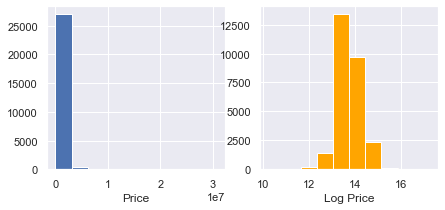

In [160]:
# did our log model normalize the distribution of our 'sqft_living' data? 
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(7,3))
ax1.hist(y_raw)
ax1.set_xlabel("Price")
ax2.hist(y_log, color="orange")
ax2.set_xlabel("Log Price");

Although the frequency of values in the distribution of 'price' is not perfectly bell curve shaped, we can see that the clustering of data to the left of our untranformed histogram has been ditributed way more evenly around our peak, demonstrating that our log transformation has helped to make our data more suitable for modeling.  

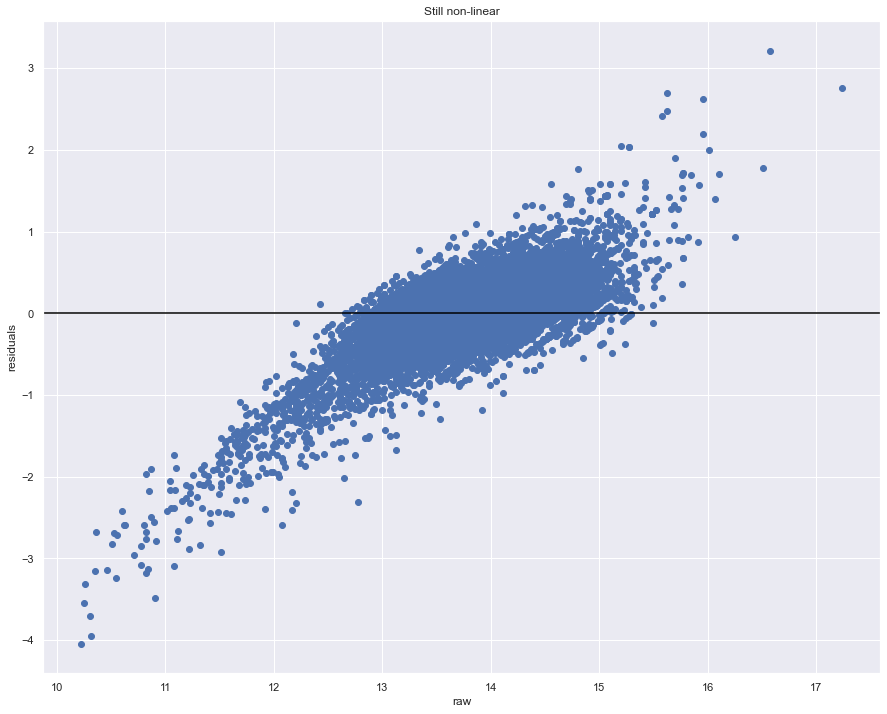

In [163]:
fig, ax = plt.subplots()

ax.scatter(y_log, X_log_results.resid)
ax.axhline(y=0, color="black")
ax.set_xlabel("raw")
ax.set_ylabel("residuals")
ax.set_title("Still non-linear");

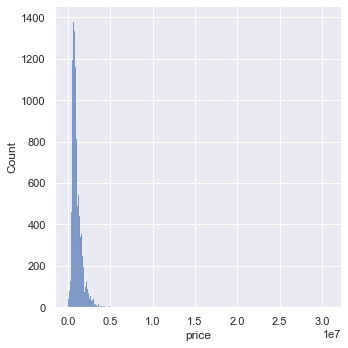

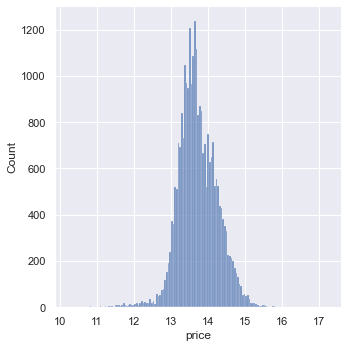

In [164]:
sns.displot(y_raw)#plot "price"
plt.show()
sns.displot(y_log)#plot "log price"
plt.show()


In [173]:
mae_centered = X_centered_results.resid.abs().sum() / len(y_log)
print("centerd MAE:", mae_centered)
print("centered MAE as decimal:", mae_centered/ 1051000)
mae_log_centered = X_log_results.resid.abs().sum() / len(y_log)
print("Log MAE:" mae_log_centered)

263112.6636992153
0.2335444349816919


## Step 5: Calculate an Error-Based Metric


### Checking L.I.N.E.

* Linear relationship between the response variable (y) and predictor (x).  
    -Can be checked by using Linear Rainbow.  Results should be close to 0

* Data is independent: 1. Data avoids collinearity (features can't be used to predict each other)  2.  Data is not autocorrelated (correlated with itself)
    -Our OLS model lacked any warnings- our variables were independant

* Model residuals are normally distributed
    -our 

* Homoscedasticity- data has an equal variance


#### Linear relationship

In [169]:
print("Baseline results:", linear_rainbow(baseline_results))
print("Log results:", linear_rainbow(X_log_results))

Baseline results: (1.211421606149961, 2.2061241245687424e-29)
Log results: (0.960444790368475, 0.9907967961336922)


## Recommendations

## Next Steps

#### Homoscedasticity

### Neighborhoods

In [9]:

import folium
from folium.plugins import MarkerCluster
from folium.plugins import HeatMap


In [ ]:
"""#Define coordinates of where we want to center our map
kc_coords = [47.6561, -122.005]

#Create the map
my_map = folium.Map(location = kc_coords, zoom_start = 13)

#Display the map
my_map

#look into geopandas but it gets complicated or plotly
"""

Lets try to get some neighborhood names attatched to those zip codes.  We'll use the 'zip_code_database' from https://www.unitedstateszipcodes.org/ to correlate our names to the zipcodes we extracted before.

In [ ]:
zips_= zips_kc[['zip', 'primary_city', 'state']]
zips_= zips_.where(zips_['state']=='WA')
zips_.dropna(inplace=True)


In [90]:
zips_= zips_kc[['zip', 'primary_city', 'state']]
zips_= zips_.where(zips_['state']=='WA')
zips_.dropna(inplace=True)

In [98]:
df_kc['neighborhood'].map(zips_.set_index('zip')['primary_city'])


In [ ]:
#to check column names after OHE
"""
df['column_name'].value_counts()
"""

# Seaborne regplot to visualize original data with regression line 

"""
(need to use after making model with OLS)
sns.regplot(x="sqft_living", y="price", data=df);
"""

# checking for linearity in residuals
"""linear_model = sm.OLS(y, sm.add_constant(X))
linear_results = linear_model.fit()

fig, ax = plt.subplots()

ax.scatter(y, linear_results.resid, color="green")
ax.axhline(y=0, color="black")
ax.set_xlabel("y")
ax.set_ylabel("residuals")
ax.set_title("Linear Relationship Residual Plot");"""

# To make a model
"""

data = pd.read_csv("auto-mpg.csv")
y_raw = data["mpg"]
X_raw = data[["weight", "model year"]]
X_raw

baseline_model = sm.OLS(y_raw, sm.add_constant(X_raw))
baseline_results = baseline_model.fit()
print(baseline_results.summary())
"""

# to transform values log

"""
X_weight_log = X_raw.copy()

X_weight_log["log(weight)"] = np.log(X_weight_log["weight"])

# Visually inspect raw vs. transformed values
X_weight_log[["weight", "log(weight)"]]

"""
# Plot distributions of raw vs. transformed values
# (scales are so different that it's not reasonable to share an x-axis)
"""
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(7,3))
ax1.hist(X_weight_log["weight"])
ax1.set_xlabel("weight")
ax2.hist(X_weight_log["log(weight)"], color="orange")
ax2.set_xlabel("log(weight)");
"""

# compare original to log
"""
weight_log_model = sm.OLS(y_raw, sm.add_constant(X_weight_log))
weight_log_results = weight_log_model.fit()

print(f"""
Baseline model adjusted R-Squared:    {baseline_results.rsquared_adj}
log(weight) model adjusted R-Squared: {weight_log_results.rsquared_adj}
""")

"""